In [3]:

import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 

In [5]:
#get the stock quote
df=web.DataReader('AAPL',data_source='yahoo',start='2012-01-01',end='2019-12-17')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.540047
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.607438
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.747403
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.880663
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.860233
...,...,...,...,...,...,...
2019-12-11,67.775002,67.125000,67.202499,67.692497,78756800.0,66.426819
2019-12-12,68.139999,66.830002,66.945000,67.864998,137310400.0,66.596100
2019-12-13,68.824997,67.732498,67.864998,68.787498,133587600.0,67.501358


In [6]:
df.shape


(2003, 6)

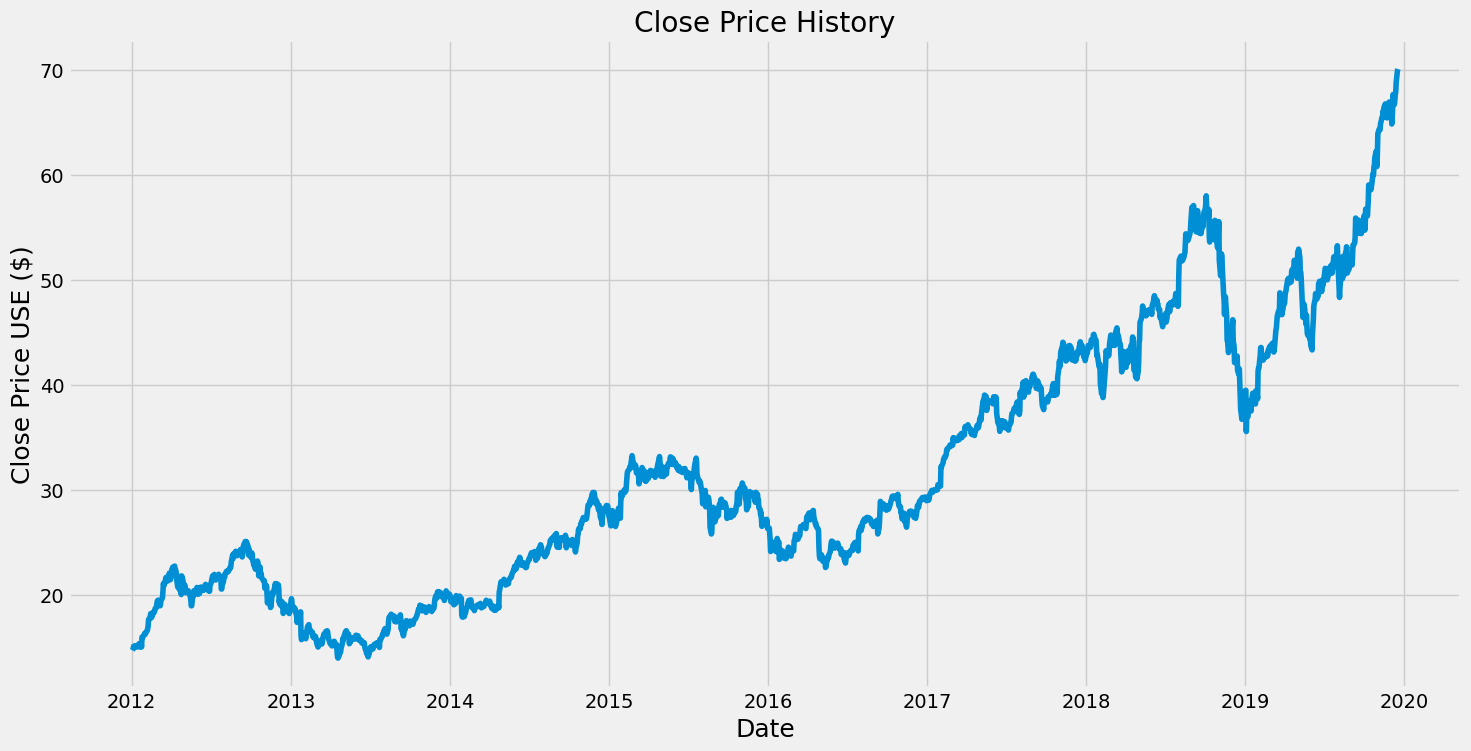

In [8]:
#visualize the closing price
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USE ($)',fontsize=18)
plt.show()


In [9]:
#Create a new dataframe with only the 'close column'
data=df.filter(['Close'])
dataset = data.values
training_data_len=math.ceil(len(dataset)*.8)
training_data_len


1603

In [10]:
#scale the data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

scaled_data

array([[0.01316509],
       [0.01457063],
       [0.01748985],
       ...,
       [0.97658263],
       [0.99755134],
       [1.        ]])

In [12]:
#Create the training dataset
#create the scaled trainging dataset
train_data=scaled_data[0:training_data_len,:]
x_train=[]
y_train=[]
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()


[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.01893355, 0.02345548, 0.01900352,
       0.03569838, 0.03440732, 0.0360927 , 0.03973694, 0.04194384,
       0.0417594 , 0.0410789 , 0.04397903, 0.04670744, 0.04979839,
       0.05479095, 0.0652785 , 0.06543749, 0.07127594, 0.07563885,
       0.06814049, 0.07102789, 0.07097066, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600558, 0.09214292, 0.09661394,
       0.09790501, 0.09835659, 0.09071194, 0.08886753, 0.08914103,
       0.09632778, 0.09835024, 0.10269409, 0.11293358, 0.12659476,
       0.12403805, 0.1240444 , 0.13392141, 0.13701237, 0.13481179,
       0.13280207, 0.13070964, 0.13766105, 0.14243103, 0.14442805])]
[0.13949272033425864]

[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.01

In [13]:
#convert the x_train and y_train to numpy arrays
x_train,y_train= np.array(x_train),np.array(y_train)

x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1543, 60, 1)

In [15]:
#build the lstm model
model=Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=( x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [16]:
#compile the model
model.compile(optimizer='adam',loss='mean_sqared_error')

In [19]:
model.fit(x_train,y_train,batch_size=1,epochs=1)

ValueError: in user code:

    File "c:\Users\it's me\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\it's me\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\it's me\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\it's me\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 994, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\it's me\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "c:\Users\it's me\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\compile_utils.py", line 240, in __call__
        self.build(y_pred)
    File "c:\Users\it's me\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\compile_utils.py", line 182, in build
        self._losses = tf.nest.map_structure(
    File "c:\Users\it's me\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\compile_utils.py", line 353, in _get_loss_object
        loss = losses_mod.get(loss)
    File "c:\Users\it's me\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 2649, in get
        return deserialize(identifier)
    File "c:\Users\it's me\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 2603, in deserialize
        return deserialize_keras_object(
    File "c:\Users\it's me\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\generic_utils.py", line 769, in deserialize_keras_object
        raise ValueError(

    ValueError: Unknown loss function: mean_sqared_error. Please ensure this object is passed to the `custom_objects` argument. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.


In [21]:
#create a testing data set
#create a new array contaning scaled values form idex 1543 to 2003
test_data=scaled_data[training_data_len-60:,:]
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])


In [ ]:
x_test=np.array(x_test)

In [22]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))


AttributeError: 'list' object has no attribute 'shape'

In [25]:
#get the models prdicted price values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)



ValueError: in user code:

    File "c:\Users\it's me\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "c:\Users\it's me\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\it's me\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Users\it's me\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
        return self(x, training=False)
    File "c:\Users\it's me\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\it's me\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\input_spec.py", line 216, in assert_input_compatibility
        raise ValueError(

    ValueError: Layer "sequential_1" expects 1 input(s), but it received 400 input tensors. Inputs received: [<tf.Tensor 'IteratorGetNext:0' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:1' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:2' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:3' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:4' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:5' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:6' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:7' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:8' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:9' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:10' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:11' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:12' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:13' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:14' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:15' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:16' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:17' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:18' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:19' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:20' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:21' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:22' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:23' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:24' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:25' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:26' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:27' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:28' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:29' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:30' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:31' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:32' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:33' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:34' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:35' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:36' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:37' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:38' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:39' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:40' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:41' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:42' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:43' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:44' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:45' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:46' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:47' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:48' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:49' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:50' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:51' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:52' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:53' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:54' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:55' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:56' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:57' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:58' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:59' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:60' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:61' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:62' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:63' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:64' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:65' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:66' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:67' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:68' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:69' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:70' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:71' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:72' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:73' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:74' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:75' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:76' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:77' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:78' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:79' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:80' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:81' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:82' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:83' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:84' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:85' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:86' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:87' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:88' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:89' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:90' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:91' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:92' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:93' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:94' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:95' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:96' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:97' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:98' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:99' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:100' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:101' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:102' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:103' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:104' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:105' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:106' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:107' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:108' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:109' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:110' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:111' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:112' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:113' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:114' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:115' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:116' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:117' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:118' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:119' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:120' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:121' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:122' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:123' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:124' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:125' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:126' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:127' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:128' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:129' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:130' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:131' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:132' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:133' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:134' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:135' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:136' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:137' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:138' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:139' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:140' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:141' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:142' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:143' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:144' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:145' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:146' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:147' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:148' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:149' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:150' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:151' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:152' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:153' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:154' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:155' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:156' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:157' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:158' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:159' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:160' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:161' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:162' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:163' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:164' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:165' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:166' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:167' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:168' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:169' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:170' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:171' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:172' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:173' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:174' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:175' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:176' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:177' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:178' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:179' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:180' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:181' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:182' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:183' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:184' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:185' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:186' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:187' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:188' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:189' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:190' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:191' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:192' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:193' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:194' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:195' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:196' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:197' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:198' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:199' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:200' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:201' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:202' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:203' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:204' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:205' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:206' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:207' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:208' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:209' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:210' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:211' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:212' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:213' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:214' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:215' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:216' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:217' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:218' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:219' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:220' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:221' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:222' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:223' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:224' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:225' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:226' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:227' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:228' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:229' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:230' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:231' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:232' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:233' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:234' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:235' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:236' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:237' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:238' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:239' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:240' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:241' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:242' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:243' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:244' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:245' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:246' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:247' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:248' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:249' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:250' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:251' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:252' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:253' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:254' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:255' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:256' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:257' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:258' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:259' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:260' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:261' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:262' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:263' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:264' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:265' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:266' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:267' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:268' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:269' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:270' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:271' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:272' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:273' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:274' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:275' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:276' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:277' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:278' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:279' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:280' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:281' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:282' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:283' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:284' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:285' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:286' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:287' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:288' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:289' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:290' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:291' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:292' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:293' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:294' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:295' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:296' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:297' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:298' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:299' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:300' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:301' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:302' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:303' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:304' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:305' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:306' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:307' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:308' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:309' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:310' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:311' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:312' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:313' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:314' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:315' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:316' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:317' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:318' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:319' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:320' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:321' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:322' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:323' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:324' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:325' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:326' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:327' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:328' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:329' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:330' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:331' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:332' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:333' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:334' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:335' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:336' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:337' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:338' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:339' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:340' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:341' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:342' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:343' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:344' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:345' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:346' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:347' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:348' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:349' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:350' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:351' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:352' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:353' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:354' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:355' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:356' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:357' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:358' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:359' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:360' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:361' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:362' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:363' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:364' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:365' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:366' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:367' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:368' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:369' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:370' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:371' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:372' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:373' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:374' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:375' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:376' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:377' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:378' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:379' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:380' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:381' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:382' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:383' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:384' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:385' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:386' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:387' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:388' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:389' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:390' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:391' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:392' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:393' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:394' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:395' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:396' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:397' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:398' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:399' shape=(None,) dtype=float32>]
